<div align="center">
      <h1>Linear Classifier as a Template Matching Algorithm</h1>
      <hr>
      <p>In this notebook, you will implement a linear classifier on CIFAR-10. In images it might be better to think about linear classifier differently than in the previous notebook. In the previous notebook, we have used the linear classifier to classify the data points in the feature space. We tried to find the best hyperplanes that separate the data points in the feature space. In images, we can think about the linear classifier as a classifier that tries to find the best hyperplanes that separate the images in the pixel space, but that is kind of hard to imagine. Instead we will build an understaning of the linear classifier using different perspective - template matching.</p>
</div>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

In [2]:
from utils import download_cifar10

# download the CIFAR-10 dataset
cifar10_dir = './data/datasets/CIFAR10'
download_cifar10(cifar10_dir)

CIFAR-10 dataset already exists


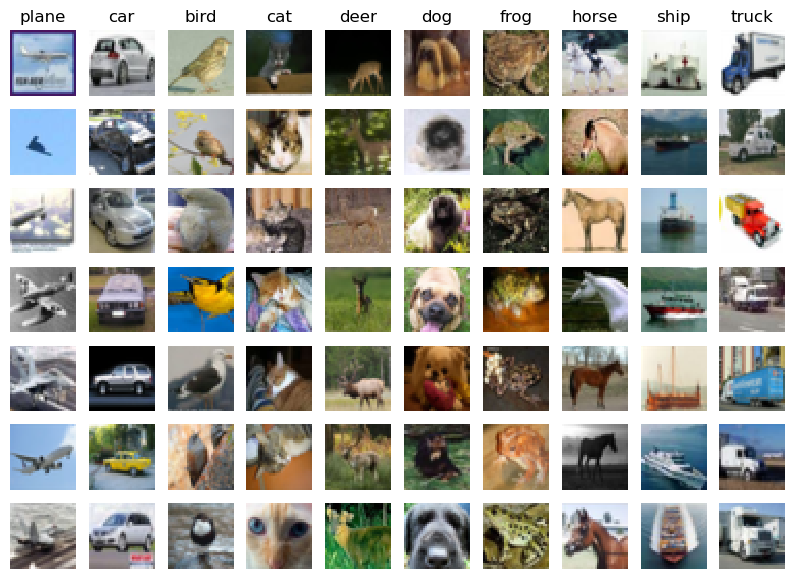

---------------- Training data ----------------
X_train shape: torch.Size([50000, 32, 32, 3]), y_train shape: torch.Size([50000])

---------------- Testing data ----------------
X_test shape: torch.Size([10000, 32, 32, 3]), y_test shape: torch.Size([10000])

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 60000
Number of samples in training set: 50000, which is 83.33% of the dataset
Number of samples in testing set: 10000, which is 16.67% of the dataset


In [3]:
from utils.cifar import load_cifar10, visualize_cifar10
from assignments_solution import reshape_to_vectors

X_train, y_train, X_test, y_test = load_cifar10(cifar10_dir)
visualize_cifar10(X_train, y_train)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

num_features = torch.numel(X_train[0])
num_classes = len(torch.unique(y_train))
num_samples = len(X_train) + len(X_test)

# Print the shapes of the data
print('---------------- Training data ----------------')
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

print('\n---------------- Testing data ----------------')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print('\n---------------- Dataset info ----------------')
print(f'Number of classes: {num_classes}')
print(f'Number of features: {num_features}')
print(f'Number of samples in dataset: {num_samples}')
print(f'Number of samples in training set: {len(X_train)}, '
      f'which is {100 * len(X_train) / num_samples:.2f}% of the dataset')
print(f'Number of samples in testing set: {len(X_test)}, '
      f'which is {100 * len(X_test) / num_samples:.2f}% of the dataset')

# Reshape the image data into rows
X_train = reshape_to_vectors(X_train)
X_test = reshape_to_vectors(X_test)

iteration 0 / 1000: 4.154877185821533
iteration 100 / 1000: 2.276567220687866
iteration 200 / 1000: 2.1928658485412598
iteration 300 / 1000: 2.11797833442688
iteration 400 / 1000: 1.9896881580352783
iteration 500 / 1000: 2.017120122909546
iteration 600 / 1000: 1.9907602071762085
iteration 700 / 1000: 1.9595706462860107
iteration 800 / 1000: 1.8978592157363892
iteration 900 / 1000: 1.9400056600570679


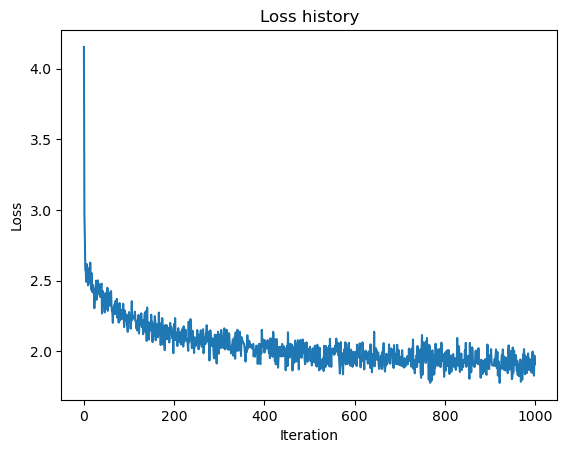

Accuracy: 0.33


In [4]:
from sklearn.metrics import accuracy_score
from assignments_solution import LinearClassifier

# Create a linear classifier instance
linear_classifier = LinearClassifier(num_features=num_features,
                                     num_classes=num_classes,
                                     weight_scale=0.01,
                                     learning_rate=1e-7,
                                     num_iters=1000,
                                     batch_size=200,
                                     verbose=True)

# Train the classifier
loss_history = linear_classifier.train(X_train, y_train)


# plot the loss history
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss history')
plt.show()

# predict labels for the training set
y_pred = linear_classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

[ 11  25  29  30  32  33  36  40  42  43  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 210 211 212 215 216 219
 221 222 224]
[  2  10  35  39  41  42  43  44  45  46  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 

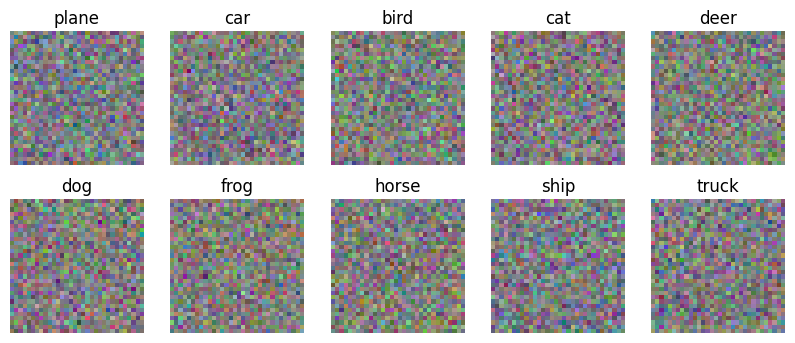

In [113]:
w = linear_classifier.W.data
w = w.reshape(32, 32, 3, 10)

w_min, w_max = torch.min(w), torch.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for c in range(num_classes):
    wimg = 255.0 * (w[:, :, :, c].squeeze() - w_min) / (w_max - w_min)
    wimg = wimg.type(torch.uint8).numpy()
    print(np.unique(wimg))
    axes.flat[c].imshow(wimg)
    axes.flat[c].axis('off')
    axes.flat[c].set_title(classes[c])

## Normalizing the data

Now we will normalize the data and see how it affects the performance of the classifier. Go to the `assignments/preprocessing.py` file and implement the `normalize_data` function. After you have implemented the function, run the following cells to normalize the data and train the classifier again.

In [5]:
from assignments_solution import normalize_data

X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)

In [99]:
# Create a W matrix with xavier initialization
W = torch.randn(num_features, num_classes) * np.sqrt(2 / (num_features + num_classes)) * 0.01

# Take a random sample from the training set
X_sample = X_train_normalized[0]
y_sample = y_train[0]

# Compute the logits
logits = torch.matmul(X_sample, W)

# Compute the probabilities
probs = torch.nn.functional.softmax(logits, dim=0)

print(f'X_sample: {X_sample}')
print(f'W: {W}')
print(f'logits: {logits}')
print(f'probs: {probs}')

X_sample: tensor([-0.9768, -1.0157, -0.8646,  ..., -0.0560, -0.5403, -0.6414])
W: tensor([[ 2.7844e-05, -2.6260e-04, -1.1944e-04,  ..., -4.0615e-04,
          2.3171e-04,  1.8410e-04],
        [-8.0554e-05,  2.7255e-04,  9.0377e-05,  ...,  1.8848e-04,
          1.3175e-04, -2.2606e-04],
        [ 2.6854e-04,  5.3377e-04, -1.5946e-04,  ..., -3.7357e-04,
          2.1087e-04,  7.7959e-06],
        ...,
        [-4.7099e-04, -6.5637e-05,  5.4782e-04,  ...,  2.4595e-04,
         -5.1549e-05,  8.7754e-06],
        [ 1.3396e-04, -1.1049e-04,  6.9688e-04,  ..., -2.2478e-04,
          4.1600e-04,  9.3742e-05],
        [-6.4338e-05,  2.1335e-04, -1.4963e-04,  ...,  3.6542e-04,
          3.3266e-05,  2.6649e-04]])
logits: tensor([ 0.0203,  0.0063,  0.0205, -0.0012, -0.0143,  0.0110, -0.0198, -0.0069,
        -0.0022,  0.0024])
probs: tensor([0.1019, 0.1005, 0.1019, 0.0997, 0.0984, 0.1009, 0.0979, 0.0991, 0.0996,
        0.1001])


iteration 0 / 3000: 2557.16064453125
iteration 100 / 3000: 11414.142578125
iteration 200 / 3000: 10046.0771484375
iteration 300 / 3000: 8557.6611328125
iteration 400 / 3000: 7158.7412109375
iteration 500 / 3000: 9709.2626953125
iteration 600 / 3000: 5395.23779296875
iteration 700 / 3000: 5303.244140625
iteration 800 / 3000: 5097.38134765625
iteration 900 / 3000: 5037.92919921875
iteration 1000 / 3000: 6217.642578125
iteration 1100 / 3000: 4671.6611328125
iteration 1200 / 3000: 8217.5966796875
iteration 1300 / 3000: 7705.09033203125
iteration 1400 / 3000: 6680.83154296875
iteration 1500 / 3000: 7079.19384765625
iteration 1600 / 3000: 12027.58984375
iteration 1700 / 3000: 6987.68603515625
iteration 1800 / 3000: 7767.97119140625
iteration 1900 / 3000: 6719.52978515625
iteration 2000 / 3000: 8304.3916015625
iteration 2100 / 3000: 7086.05517578125
iteration 2200 / 3000: 3064.451171875
iteration 2300 / 3000: 9652.41015625
iteration 2400 / 3000: 7802.3193359375
iteration 2500 / 3000: 4150.782

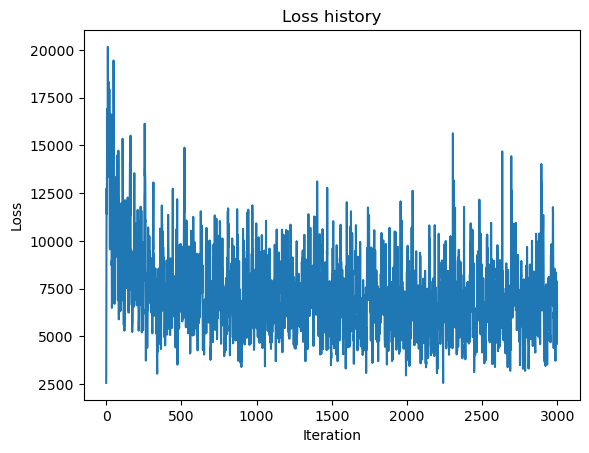

Accuracy: 0.31


In [6]:
from assignments_solution import LinearClassifier

# Create a linear classifier instance
linear_classifier = LinearClassifier(num_features=num_features,
                                     num_classes=num_classes,
                                     weight_scale=10,
                                     learning_rate=1e-3, # 1
                                     reg=1e-1, # 1e-5
                                     num_iters=3000,
                                     batch_size=100,
                                     verbose=True)

# Train the classifier
loss_history = linear_classifier.train(X_train, y_train)


# plot the loss history
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss history')
plt.show()

# predict labels for the training set
y_pred = linear_classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

[ 38  42  46  51  52  55  58  60  61  62  63  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 204 205 206 208 218 221 222 224]
[  8  10  18  25  35  37  40  41  43  45  47  48  50  51  52  53  54  55
  56  57  58  59  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 1

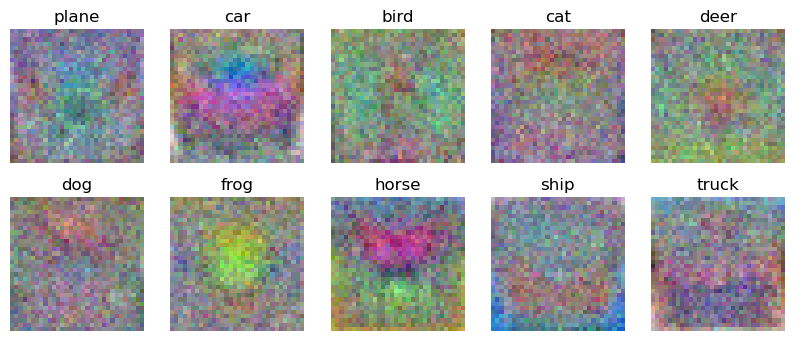

In [7]:
w = linear_classifier.W.data
w = w.reshape(32, 32, 3, 10)

w_min, w_max = torch.min(w), torch.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for c in range(num_classes):
    wimg = 255.0 * (w[:, :, :, c].squeeze() - w_min) / (w_max - w_min)
    wimg = wimg.type(torch.uint8).numpy()
    print(np.unique(wimg))
    axes.flat[c].imshow(wimg)
    axes.flat[c].axis('off')
    axes.flat[c].set_title(classes[c])

## QUESTIONS
1. Why is the accuracy higher when the classifier is trained on normalized data?
2. Why the weights of the classifier trained on normalized data look less noisy?

## ANSWERS

...